In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [3]:
train.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0
799,800,1,0,0,1,1,0,0,1,1,...,f,Asian,no,no,New Zealand,no,12.060168,18 and more,Self,0


In [4]:
print(train.columns)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [5]:
print(test.columns)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')


In [6]:
print(sample_submission.columns)

Index(['ID', 'Class/ASD'], dtype='object')


In [29]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [30]:
train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

## visualization

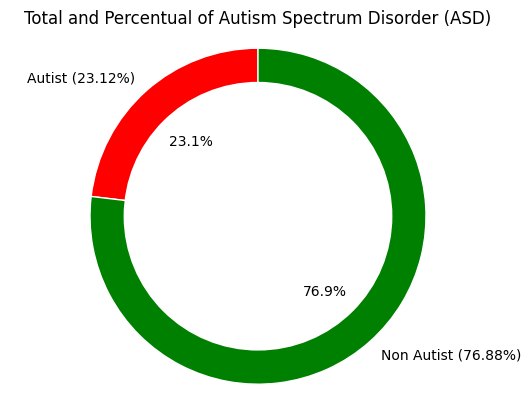

In [31]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
autist_count = train['Class/ASD'].sum()
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist ({autist_percent:.2f}%)', f'Non Autist ({non_autist_percent:.2f}%)'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()

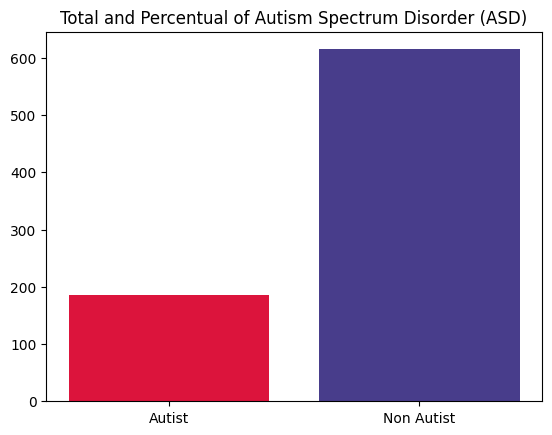

In [7]:
autist_count = train['Class/ASD'].sum()
non_autist_count = len(train) - autist_count

fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()

In [8]:
train["ethnicity"].value_counts()

ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

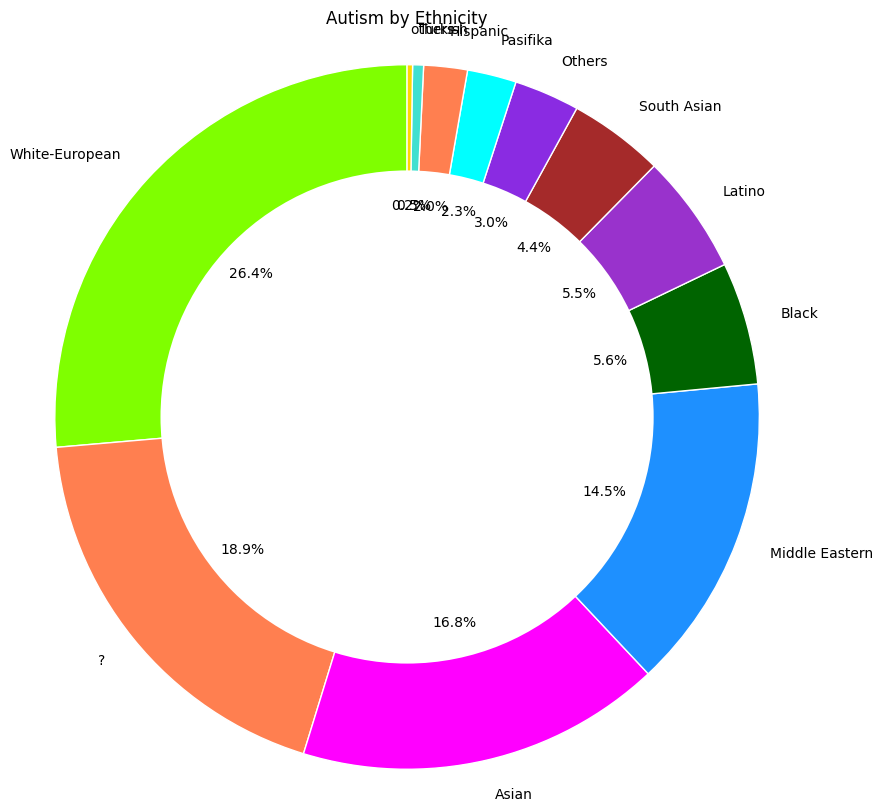

In [9]:
# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Plotting the donut chart for ethnicity
fig, ax = plt.subplots(figsize=(10, 10))

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['ethnicity'].value_counts()

# Draw the donut chart
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90,
       colors=ethnicity_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Autism by Ethnicity')
plt.show()

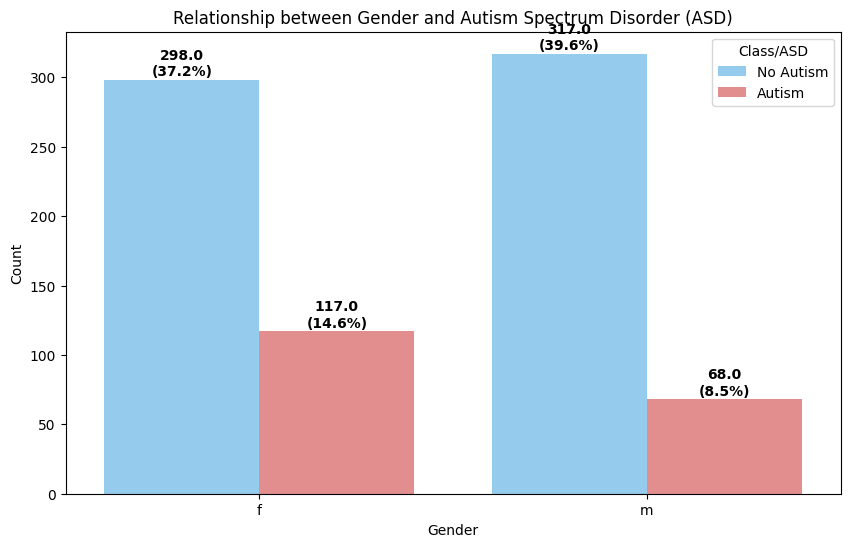

In [10]:
# Define colors for each class
class_colors = {0: 'lightskyblue', 1: 'lightcoral'}

# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Class/ASD', data=train, palette=class_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

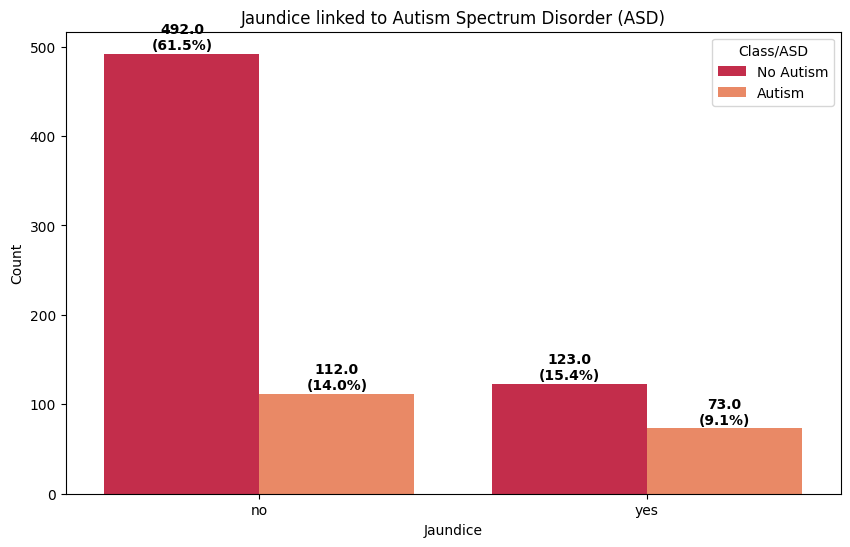

In [11]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

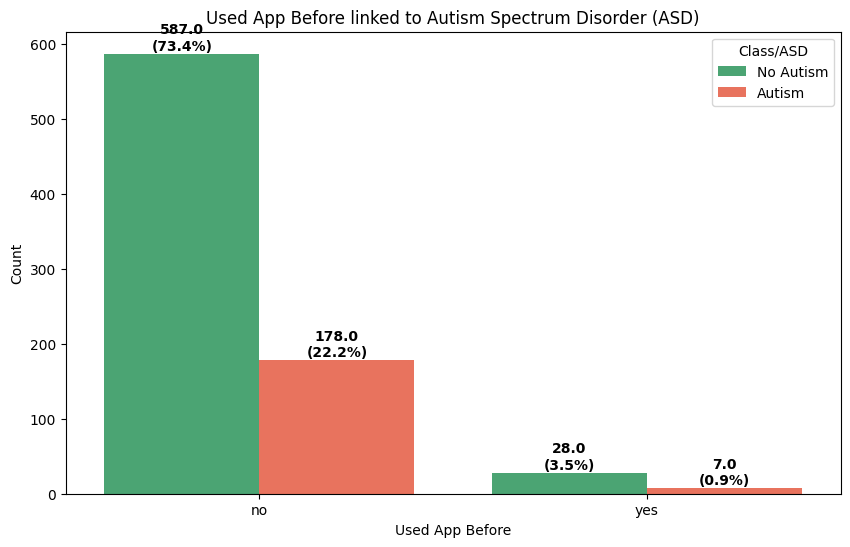

In [12]:
# Define colors for each class
used_app_colors = ['mediumseagreen', 'tomato']
used_app_map = {'yes': 'Used App Before', 'no': 'No App Usage'}

# Plotting the relationship between Used App Before and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='used_app_before', hue='Class/ASD', data=train, palette=used_app_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used App Before linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

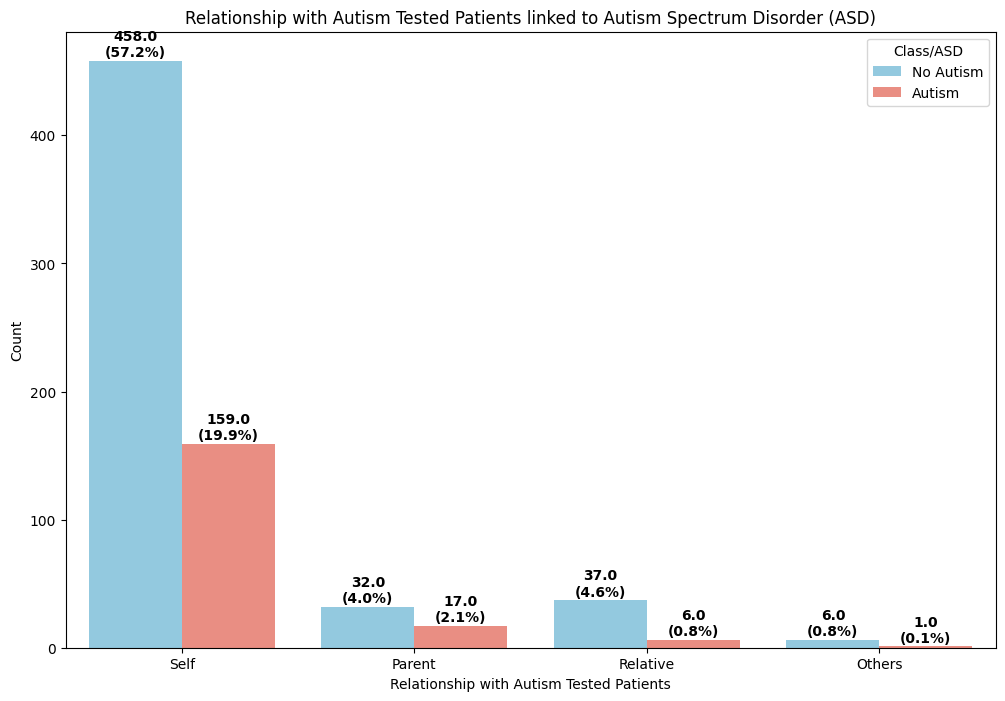

In [13]:
# Define colors for each class
relation_colors = ['skyblue', 'salmon']
relation_map = {'Self': 'Self', 'Parent': 'Parent', 'Relative': 'Relative', 'Others': 'Others'}

# Plotting the relationship with Autism Tested Patients and Class/ASD
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='relation', hue='Class/ASD', data=train, palette=relation_colors, order=['Self', 'Parent', 'Relative', 'Others'])

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Relationship with Autism Tested Patients')
plt.ylabel('Count')
plt.title('Relationship with Autism Tested Patients linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()

C:\Users\dhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\dhana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<Figure size 1200x800 with 0 Axes>

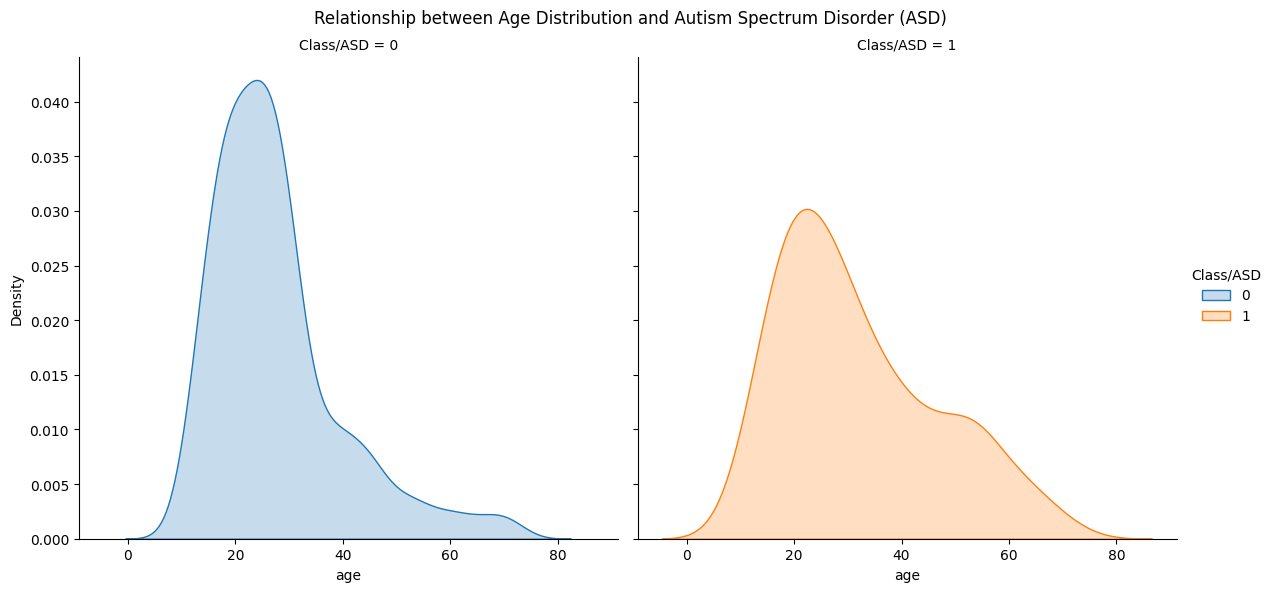

In [14]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'age', shade=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()

## Preprocessing

1.Data dosen't have a null value

2.Data Encoding

In [15]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [16]:
cat = {'ethnicity':'category',
       'gender':'category', 
       'jaundice':'category',
       'austim':'category',
       'contry_of_res':'category', 
       'used_app_before':'category',
        'age_desc':'category',
        'relation':'category'}
test = test.astype(cat)
train = train.astype(cat)

In [17]:
cat_columns = ['ethnicity', 'gender', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in cat_columns:
    train[col] = train[col].cat.codes
    test[col] = test[col].cat.codes

In [18]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,2,0,1,32,0,7.949723,0,5,0


In [19]:
print(train.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender                int8
ethnicity             int8
jaundice              int8
austim                int8
contry_of_res         int8
used_app_before       int8
result             float64
age_desc              int8
relation              int8
Class/ASD            int64
dtype: object


3.Drob unusiful data

In [20]:
train=train.drop('ID', axis=1)
train=train.drop('relation', axis=1)

In [21]:
test=test.drop('ID', axis=1)
test=test.drop('relation', axis=1)

# 4.Split Data

In [22]:
X = train.drop('Class/ASD', axis=1)
y = train['Class/ASD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.Standard Scaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Classification

# 1.Random Forest

In [24]:
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_val)

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[106  15]
 [ 11  28]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.65      0.72      0.68        39

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.84      0.84      0.84       160

